In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data1 = pd.read_csv("./datasets/all_cust_with_date.csv", sep=";", dtype={"cust_id":"object"})

In [2]:
df = data1.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405037 entries, 0 to 405036
Data columns (total 55 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   q_date                     405037 non-null  object 
 1   cust_id                    405037 non-null  object 
 2   cust_date                  405037 non-null  object 
 3   consumer_loan_balance      405037 non-null  float64
 4   vehicle_loan_balance       405037 non-null  float64
 5   mortgage_balance           405037 non-null  float64
 6   overdraft_balance          405037 non-null  float64
 7   overdraft_avg              405037 non-null  float64
 8   savings_balance            405037 non-null  float64
 9   drawing_balance            405037 non-null  float64
 10  savings_avg                405037 non-null  float64
 11  drawing_avg                405037 non-null  float64
 12  salary_avg                 405037 non-null  float64
 13  has_salary                 40

In [4]:
df["cust_date"] = pd.to_datetime(df["cust_date"])

In [5]:
df["cust_years"] = df["cust_date"].apply(lambda x: 2019 - x.year)

In [6]:
df.insert(3, "cust_year", df["cust_years"])

In [7]:
df.insert(18, "has_salary_account", df["has_salary"])

In [8]:
df.insert(19, "has_default_record", df["has_nonperforming_loan"])

In [9]:
df = df.drop(["has_nonperforming_loan",
              "has_salary", "cust_years",
              "q_date",
              "cust_date",
              "number_of_products",
              "salary_avg",
              "number_of_active_products"], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405037 entries, 0 to 405036
Data columns (total 51 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   cust_id                405037 non-null  object 
 1   cust_year              405037 non-null  int64  
 2   consumer_loan_balance  405037 non-null  float64
 3   vehicle_loan_balance   405037 non-null  float64
 4   mortgage_balance       405037 non-null  float64
 5   overdraft_balance      405037 non-null  float64
 6   overdraft_avg          405037 non-null  float64
 7   savings_balance        405037 non-null  float64
 8   drawing_balance        405037 non-null  float64
 9   savings_avg            405037 non-null  float64
 10  drawing_avg            405037 non-null  float64
 11  card_limit             405037 non-null  float64
 12  has_salary_account     405037 non-null  int64  
 13  has_default_record     405037 non-null  int64  
 14  has_deferred_payment   405037 non-nu

In [11]:
data2 = pd.read_csv("./datasets/product_1_usage.csv", sep=";", dtype={"Cust_ID":"object"})

In [12]:
df_target = data2.copy()
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104553 entries, 0 to 104552
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Cust_ID    104553 non-null  object
 1   Prod_ID    104553 non-null  int64 
 2   Date       104553 non-null  object
 3   Price      104553 non-null  object
 4   State      104553 non-null  object
 5   Type_Code  104553 non-null  int64 
 6   Type       104553 non-null  object
 7   Via_Loan   104553 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 6.4+ MB


In [13]:
df_target = df_target.drop_duplicates("Cust_ID")

In [14]:
df_target["product_1_purchase"] = 1
df_target = df_target.rename(columns={"Cust_ID": "cust_id"})
df_target = df_target[["cust_id", "product_1_purchase"]]

In [15]:
df["counter1"] = 0 #df.iloc[:,[15,16,18,20,22,24,27,28,30,32,34,36,38,40,42,44,46,48,50]]
df["counter2"] = 0 #df.iloc[:,[15,16,17,19,21,23,25,26,29,31,33,35,37,39,41,43,45,47,49]]

In [16]:
for i in [15,16,18,20,22,24,27,28,30,32,34,36,38,40,42,44,46,48,50]:
    df.loc[(df.iloc[:,i] > 0), "counter1"] = df["counter1"] + 1
    
for i in [15,16,17,19,21,23,25,26,29,31,33,35,37,39,41,43,45,47,49]:
    df.loc[(df.iloc[:,i] > 0), "counter2"] = df["counter2"] + 1

In [17]:
df.insert(12, "number_of_product", df["counter1"])
df.insert(13, "number_of_active", df["counter2"])

In [18]:
df = df.drop(["counter1",
              "counter2"], axis=1)

In [19]:
df["cust_value"] = (df["consumer_loan_balance"] +
                    df["vehicle_loan_balance"] +
                    df["mortgage_balance"] +
                    df["overdraft_balance"])*0.8 + (df["savings_balance"] +
                                                    df["drawing_balance"])*0.2 + (df["card_limit"])*0.1 + (df["has_salary_account"])*100 - (df["has_deferred_payment"])*100 - (df["has_deferred_payment"])*1000

In [20]:
df.insert(12, "customer_premium", df["cust_value"])

In [21]:
df = df.drop("cust_value", axis=1)

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cust_year,405037.0,8.476384,5.601310,0.0,4.000,7.000,14.000,2.000000e+01
consumer_loan_balance,405037.0,2244.858483,9503.904062,0.0,0.000,0.000,0.000,9.002289e+05
vehicle_loan_balance,405037.0,52.097371,1628.360332,0.0,0.000,0.000,0.000,2.448068e+05
mortgage_balance,405037.0,3008.528494,20290.244819,0.0,0.000,0.000,0.000,2.054994e+06
overdraft_balance,405037.0,378.822562,1623.025670,0.0,0.000,0.000,0.000,7.393368e+04
overdraft_avg,405037.0,332.860678,1474.450277,0.0,0.000,0.000,0.000,9.194262e+04
savings_balance,405037.0,6469.294665,78258.949775,0.0,0.000,0.000,0.000,1.167226e+07
drawing_balance,405037.0,1011.171753,8136.710073,0.0,0.000,0.540,40.560,9.456935e+05
savings_avg,405037.0,5012.835173,63920.462004,0.0,0.000,0.000,0.000,1.164756e+07
drawing_avg,405037.0,976.434044,6759.762956,0.0,0.000,4.690,328.470,9.742598e+05


**Segmentation using cust_year, customer_premium and number_of_active**

**cust_year:** years of being customer of bank

**customer_premium:** an estimation which converges the customer valuation based mainly on credit and deposit balances, and is calculated as: 

                     (consumer_loan_balance + vehicle_loan_balance + mortgage_balance + overdraft_balance)*0.8 + 
                     (savings_balance + drawing_balance)*0.2 +
                     (card_limit)*0.1 + 
                     (has_salary_account)*100 -
                     (has_deferred_payment)*100 -
                     (has_deferred_payment)*1000
      
**number_of_active:** instead owning a particular product once, it represents product usage reached a certain criteria

source: [https://www.kaggle.com/kushal1996/customer-segmentation-k-means-analysis]

source: [https://www.kaggle.com/fabiendaniel/customer-segmentation/data]

In [23]:
process_array = df[["cust_year", "customer_premium", "number_of_active"]].values
sc = StandardScaler()
process_matrix = sc.fit_transform(process_array)

In [24]:
inertia = []
for n in range(1, 11):
    km = (KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan'))
    km.fit(process_matrix)
    inertia.append(km.inertia_)

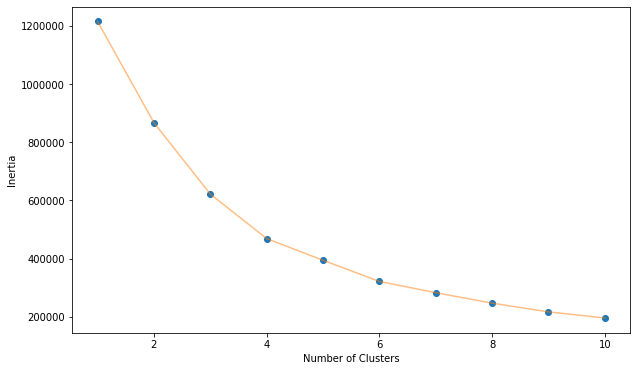

In [25]:
plt.figure(1, figsize=(10 ,6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel("Number of Clusters"), plt.ylabel("Inertia")
plt.show()

In [26]:
km = (KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan'))
km.fit(process_matrix)
labels = km.labels_
centroids = km.cluster_centers_

In [27]:
df["target_segment"] = labels

In [28]:
df = df.merge(df_target, how="left", on="cust_id")

In [29]:
df["product_1_purchase"] = df["product_1_purchase"].fillna(0)
df["product_1_purchase"] = df["product_1_purchase"].astype("int64")

In [62]:
df.loc[df["has_product_1"] == 0,"product_1_purchase"].value_counts() / df.loc[df["has_product_1"] == 0,"product_1_purchase"].count()

0    0.992262
1    0.007738
Name: product_1_purchase, dtype: float64

In [65]:
for s in range(len(df["target_segment"].value_counts())):
    print("target_segment:", s, "\n", df.loc[((df["target_segment"] == s) & (df["has_product_1"] == 0)), "product_1_purchase"].value_counts())

target_segment: 0 
 0    119960
1       322
Name: product_1_purchase, dtype: int64
target_segment: 1 
 0    197168
1       467
Name: product_1_purchase, dtype: int64
target_segment: 2 
 0    69062
1     2157
Name: product_1_purchase, dtype: int64
target_segment: 3 
 0    4154
1      98
Name: product_1_purchase, dtype: int64
